#INSTALLATIONS

In [1]:
# ==============================================================================
# CELL 1: INSTALLATION & ENVIRONMENT SETUP
# ==============================================================================
print("="*85)
print(" "*15 + "PHYSICS-INFORMED HALLUCINATION AUDITOR")
print(" "*10 + "Real-Time Validation Against Physical Laws")
print("="*85)

print("\n📦 Installing required packages...")
print("This may take 2-3 minutes...\n")

# Corrected RDKit installation
!pip install -q torch torchvision
!pip install -q pandas numpy scikit-learn
!pip install -q matplotlib seaborn
!pip install -q datasets
!pip install -q rdkit  # updated

print("✓ Installation complete!\n")

# Standard library imports
import os, sys, json, re, warnings
from pathlib import Path
from collections import defaultdict
from typing import Dict, List, Any
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML & PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Suppress warnings
warnings.filterwarnings('ignore')

# Random seeds
np.random.seed(42)
torch.manual_seed(42)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"✓ Using device: {device}")
if torch.cuda.is_available():
    print(f"  GPU: {torch.cuda.get_device_name(0)}")

print("\n✓ All imports successful!")


               PHYSICS-INFORMED HALLUCINATION AUDITOR
          Real-Time Validation Against Physical Laws

📦 Installing required packages...
This may take 2-3 minutes...

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 65.9 MB/s eta 0:00:00
✓ Installation complete!

✓ Using device: cuda
  GPU: Tesla T4

✓ All imports successful!


#IMPORTING DATASETS

In [2]:
#ReLU Project
#QM9 dataset
import kagglehub
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("zaharch/quantum-machine-9-aka-qm9")

print("Path to dataset files:", path)

# Define the destination path in the /content directory
destination_path = "/content/qm9_dataset"

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the contents of the downloaded dataset to the destination path
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True) # Use copytree for directories
    else:
        shutil.copy2(s, d) # Use copy2 for files

print(f"Dataset copied to: {destination_path}")

100%|██████████| 269M/269M [00:02<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zaharch/quantum-machine-9-aka-qm9/versions/1
Dataset copied to: /content/qm9_dataset


In [3]:
#SciQ dataset
import kagglehub
import os
import shutil

# Download latest version
path = kagglehub.dataset_download("thedevastator/sciq-a-dataset-for-science-question-answering")

print("Path to dataset files:", path)

# Define the destination path in the /content directory
destination_path = "/content/sciq_dataset"

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Copy the contents of the downloaded dataset to the destination path
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, dirs_exist_ok=True) # Use copytree for directories
    else:
        shutil.copy2(s, d) # Use copy2 for files

print(f"Dataset copied to: {destination_path}")

100%|██████████| 2.45M/2.45M [00:00<00:00, 166MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/sciq-a-dataset-for-science-question-answering/versions/2
Dataset copied to: /content/sciq_dataset


In [4]:
# Step 1: Install datasets library
!pip install datasets

# Step 2: Import load_dataset
from datasets import load_dataset
import pandas as pd

# List of CLEVRER configs
configs = ["counterfactual", "descriptive", "explanatory", "predictive"]

for config_name in configs:
    # Load train split
    ds_train = load_dataset("zechen-nlp/clevrer", config_name, split="train")
    # Save train split as CSV
    train_csv_path = f"/content/clevrer_{config_name}_train.csv"
    ds_train.to_pandas().to_csv(train_csv_path, index=False)
    print(f"Saved: {train_csv_path} ({len(ds_train)} examples)")

    # Load validation split
    ds_val = load_dataset("zechen-nlp/clevrer", config_name, split="validation")
    # Save validation split as CSV
    val_csv_path = f"/content/clevrer_{config_name}_validation.csv"
    ds_val.to_pandas().to_csv(val_csv_path, index=False)
    print(f"Saved: {val_csv_path} ({len(ds_val)} examples)")


README.md: 0.00B [00:00, ?B/s]

counterfactual/train-00000-of-00001.parq(…):   0%|          | 0.00/2.67M [00:00<?, ?B/s]

counterfactual/validation-00000-of-00001(…):   0%|          | 0.00/1.34M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/18642 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9333 [00:00<?, ? examples/s]

Saved: /content/clevrer_counterfactual_train.csv (18642 examples)
Saved: /content/clevrer_counterfactual_validation.csv (9333 examples)


descriptive/train-00000-of-00001.parquet:   0%|          | 0.00/4.67M [00:00<?, ?B/s]

descriptive/validation-00000-of-00001.pa(…):   0%|          | 0.00/2.33M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/109952 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/54990 [00:00<?, ? examples/s]

Saved: /content/clevrer_descriptive_train.csv (109952 examples)
Saved: /content/clevrer_descriptive_validation.csv (54990 examples)


explanatory/train-00000-of-00001.parquet:   0%|          | 0.00/2.34M [00:00<?, ?B/s]

explanatory/validation-00000-of-00001.pa(…):   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16799 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8488 [00:00<?, ? examples/s]

Saved: /content/clevrer_explanatory_train.csv (16799 examples)
Saved: /content/clevrer_explanatory_validation.csv (8488 examples)


predictive/train-00000-of-00001.parquet:   0%|          | 0.00/617k [00:00<?, ?B/s]

predictive/validation-00000-of-00001.par(…):   0%|          | 0.00/308k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7179 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3557 [00:00<?, ? examples/s]

Saved: /content/clevrer_predictive_train.csv (7179 examples)
Saved: /content/clevrer_predictive_validation.csv (3557 examples)


#PARSING & SANITIZATION

In [5]:
def parse_qm9_xyz(file_path):
    """
    Parse a QM9 .xyz file into:
    - atoms: [ 'C', 'H', ... ]
    - coords: [ (x,y,z), ... ]
    - props: dict of header properties
    Handles weird QM9 formats like 2.1997*^-6.
    """
    with open(file_path, "r") as f:
        lines = [l.strip() for l in f.readlines()]

    n_atoms = int(lines[0])
    header = lines[1]

    # Extract QM9 properties from header
    props = {}
    for tok in header.split():
        if "=" in tok:
            key, value = tok.split("=", 1)
            props[key] = value

    atoms = []
    coords = []
    for line in lines[2:2 + n_atoms]:
        parts = line.split()

        # Some lines may have fewer columns or unexpected formats
        if len(parts) < 4:
            continue

        atom = parts[0]
        # Fix exponent format like '2.1997*^-6' → '2.1997e-6'
        x_str = parts[1].replace("*^", "e")
        y_str = parts[2].replace("*^", "e")
        z_str = parts[3].replace("*^", "e")

        try:
            x, y, z = float(x_str), float(y_str), float(z_str)
        except ValueError:
            continue  # skip invalid lines

        atoms.append(atom)
        coords.append((x, y, z))

    return atoms, coords, props


In [6]:
from rdkit import Chem
import numpy as np

# ===== 2. Convert XYZ -> RDKit molecule (approximate, but improved) =====
COVALENT_RADII = {
    "H": 0.31, "C": 0.76, "N": 0.71, "O": 0.66, "F": 0.57,
}

def xyz_to_rdkit_mol(atoms, coords, bond_scale=1.25):
    mol = Chem.RWMol()
    idx_map = []

    # add atoms
    for sym in atoms:
        idx_map.append(mol.AddAtom(Chem.Atom(sym)))

    coords = np.array(coords)
    n = len(atoms)

    # guess bonds based on covalent radii
    for i in range(n):
        ri = COVALENT_RADII.get(atoms[i], 0.7)
        for j in range(i + 1, n):
            rj = COVALENT_RADII.get(atoms[j], 0.7)
            dij = np.linalg.norm(coords[i] - coords[j])
            max_bond = bond_scale * (ri + rj)
            if 0.4 < dij < max_bond:
                mol.AddBond(i, j, Chem.BondType.SINGLE)

    try:
        m = mol.GetMol()
        Chem.SanitizeMol(m)
        return m
    except:
        return None

In [7]:
from rdkit.Chem import Descriptors, rdMolDescriptors

# ===== 3. Audit molecule =====
TYPICAL_VALENCE = {"H": 1, "C": 4, "N": 3, "O": 2, "F": 1}

def audit_molecule(mol):
    if mol is None:
        return False, ["mol_not_sanitized"], None, None

    issues = []
    for atom in mol.GetAtoms():
        sym = atom.GetSymbol()
        val = atom.GetTotalValence()
        expected = TYPICAL_VALENCE.get(sym)
        if expected and val != expected:
            issues.append(f"{sym}_valence_{val}_expected_{expected}")

    try:
        formula = rdMolDescriptors.CalcMolFormula(mol)
        mw = Descriptors.ExactMolWt(mol)
    except Exception as e:
        issues.append(f"descriptor_err:{e}")
        formula, mw = None, None

    return (len(issues) == 0), issues, formula, mw

In [8]:

# ===== 4. Batch audit entire directory and stream to CSV =====
def audit_qm9_dir(qm9_dir, output_csv):
    # Only include real XYZ files, skip directories
    xyz_files = sorted(
        f for f in os.listdir(qm9_dir)
        if f.endswith(".xyz") and os.path.isfile(os.path.join(qm9_dir, f))
    )

    print(f"🔎 Found {len(xyz_files)} .xyz molecules")
    print(f"📄 Logging to {output_csv}")

    with open(output_csv, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["file", "valid", "issues", "formula", "mol_weight", "smiles", "energy"])

        for idx, fname in enumerate(xyz_files):
            filepath = os.path.join(qm9_dir, fname)

            atoms, coords, props = parse_qm9_xyz(filepath)
            mol = xyz_to_rdkit_mol(atoms, coords)
            valid, issues, formula, mw = audit_molecule(mol)

            smiles = props.get("smiles", None)
            energy = props.get("energy", None)

            writer.writerow([
                fname,
                valid,
                ";".join(issues),
                formula,
                mw,
                smiles,
                energy
            ])

            if (idx + 1) % 1000 == 0:
                print(f"  🧪 Audited {idx + 1} molecules...")

    print("\n🎉 Audit complete!")


In [9]:
import csv
# ===== 5. Run it on your dataset =====
qm9_dir = "/content/qm9_dataset"
output_csv = "/content/qm9_full_audit.csv"

audit_qm9_dir(qm9_dir, output_csv)

🔎 Found 133885 .xyz molecules
📄 Logging to /content/qm9_full_audit.csv


[17:12:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:50] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:12:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:50] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 1000 molecules...


[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:12:51] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted


  🧪 Audited 2000 molecules...


[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:51] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 3000 molecules...


[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:52] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 4000 molecules...


[17:12:53] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:12:53] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:53] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:53] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:53] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:53] Explicit valence for atom # 3 C, 5, is greater than permitted


  🧪 Audited 5000 molecules...


[17:12:54] Explicit valence for atom # 3 N, 4, is greater than permitted


  🧪 Audited 6000 molecules...


[17:12:54] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:12:54] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:55] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 7000 molecules...


[17:12:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:12:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:12:56] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:12:56] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:12:56] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:12:56] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:56] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 8000 molecules...


[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:57] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 9000 molecules...
  🧪 Audited 10000 molecules...


[17:12:59] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:12:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:12:59] Explicit valence for atom # 2 C, 5, is greater than permitted


  🧪 Audited 11000 molecules...


[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:00] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 12000 molecules...
  🧪 Audited 13000 molecules...


[17:13:05] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:13:05] Explicit valence for atom # 6 N, 4, is greater than permitted


  🧪 Audited 14000 molecules...


[17:13:06] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:06] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 15000 molecules...


[17:13:09] Explicit valence for atom # 3 N, 4, is greater than permitted


  🧪 Audited 16000 molecules...


[17:13:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:11] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 17000 molecules...


[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:12] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 18000 molecules...


[17:13:14] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 19000 molecules...


[17:13:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:16] Explicit valence for atom # 2 C, 5, is greater than permitted


  🧪 Audited 20000 molecules...


[17:13:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:17] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 21000 molecules...
  🧪 Audited 22000 molecules...


[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:13:18] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:18] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 23000 molecules...


[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:19] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 24000 molecules...
  🧪 Audited 25000 molecules...
  🧪 Audited 26000 molecules...
  🧪 Audited 27000 molecules...


[17:13:22] Explicit valence for atom # 4 N, 4, is greater than permitted


  🧪 Audited 28000 molecules...


[17:13:23] Explicit valence for atom # 6 N, 4, is greater than permitted


  🧪 Audited 29000 molecules...


[17:13:24] Explicit valence for atom # 7 N, 4, is greater than permitted


  🧪 Audited 30000 molecules...


[17:13:25] Explicit valence for atom # 4 N, 4, is greater than permitted


  🧪 Audited 31000 molecules...
  🧪 Audited 32000 molecules...


[17:13:27] Explicit valence for atom # 8 N, 4, is greater than permitted
[17:13:27] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:13:27] Explicit valence for atom # 11 O, 3, is greater than permitted


  🧪 Audited 33000 molecules...


[17:13:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:27] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 34000 molecules...


[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:28] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 35000 molecules...


[17:13:29] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:29] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 36000 molecules...


[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:30] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 37000 molecules...


[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 38000 molecules...


[17:13:31] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:31] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 39000 molecules...


[17:13:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:33] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 40000 molecules...


[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:34] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 41000 molecules...


[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:35] Explicit valence for atom # 6 C, 5, is g

  🧪 Audited 42000 molecules...


[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 N, 4, is g

  🧪 Audited 43000 molecules...


[17:13:37] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:13:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:37] Explicit valence for atom # 9 N, 4, is greater than permitted
[17:13:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 44000 molecules...


[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:38] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 45000 molecules...


[17:13:39] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:39] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:13:39] Explicit valence for atom # 5 N, 4, is greater than permitted


  🧪 Audited 46000 molecules...


[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:39] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 47000 molecules...


[17:13:41] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 48000 molecules...


[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 8 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:41] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 49000 molecules...


[17:13:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:42] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 50000 molecules...


[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 51000 molecules...


[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:43] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 52000 molecules...


[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:44] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 53000 molecules...


[17:13:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:45] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 54000 molecules...


[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:46] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 55000 molecules...


[17:13:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 8 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:13:47] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:13:48] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:13:48] Explicit valence for atom # 7 N, 4, is greater than permitted
[17:13:48] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:48] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 56000 molecules...


[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:49] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 57000 molecules...


[17:13:50] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:50] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 58000 molecules...


[17:13:51] Explicit valence for atom # 6 N, 4, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:13:51] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:51] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 59000 molecules...


[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:52] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 60000 molecules...


[17:13:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:53] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:13:54] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:54] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 61000 molecules...


[17:13:54] Explicit valence for atom # 8 N, 4, is greater than permitted


  🧪 Audited 62000 molecules...


[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:55] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 63000 molecules...


[17:13:56] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:56] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 64000 molecules...


[17:13:57] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:57] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 65000 molecules...


[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:13:58] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 66000 molecules...


[17:13:59] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 67000 molecules...


[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:13:59] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 68000 molecules...


[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:01] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 69000 molecules...


[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:03] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 70000 molecules...


[17:14:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 71000 molecules...


[17:14:04] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 7 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:04] Explicit valence for atom # 1 C, 5, is g

  🧪 Audited 72000 molecules...


[17:14:05] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:05] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is g

  🧪 Audited 73000 molecules...


[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:06] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 74000 molecules...


[17:14:07] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:07] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:07] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 6 C, 5, is g

  🧪 Audited 75000 molecules...


[17:14:08] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:08] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 76000 molecules...


[17:14:09] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 8 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:09] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 77000 molecules...


[17:14:10] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:10] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 78000 molecules...


[17:14:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:11] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 79000 molecules...


[17:14:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:12] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 80000 molecules...


[17:14:14] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:14] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:14] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 81000 molecules...


[17:14:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:15] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:15] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 82000 molecules...


[17:14:16] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 83000 molecules...


[17:14:17] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:17] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:17] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:17] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:17] Explicit valence for atom # 3 N, 4, is greater than permitted


  🧪 Audited 84000 molecules...


[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:18] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 85000 molecules...


[17:14:19] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:19] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:14:20] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 86000 molecules...


[17:14:20] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:14:20] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:20] Explicit valence for atom # 6 N, 4, is greater than permitted


  🧪 Audited 87000 molecules...


[17:14:21] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:21] Explicit valence for atom # 4 C, 5, is g

  🧪 Audited 88000 molecules...


[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:22] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 89000 molecules...


[17:14:23] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:23] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 90000 molecules...


[17:14:24] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:24] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 91000 molecules...


[17:14:25] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:25] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:25] Explicit valence for atom # 2 N, 4, is greater than permitted


  🧪 Audited 92000 molecules...


[17:14:27] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 93000 molecules...


[17:14:28] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:28] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:28] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 3 N, 4, is greater than permitted


  🧪 Audited 94000 molecules...


[17:14:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:29] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 95000 molecules...


[17:14:30] Explicit valence for atom # 2 N, 4, is greater than permitted


  🧪 Audited 96000 molecules...


[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 97000 molecules...


[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:32] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 98000 molecules...


[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:33] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 99000 molecules...


[17:14:34] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:34] Explicit valence for atom # 5 N, 4, is greater than permitted


  🧪 Audited 100000 molecules...


[17:14:35] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 3 N, 4, is greater than permitted
[17:14:35] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 101000 molecules...


[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:36] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 102000 molecules...


[17:14:37] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:37] Explicit valence for atom # 4 N, 4, is greater than permitted
[17:14:37] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:38] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:38] Explicit valence for atom # 0 N, 4, is greater than permitted


  🧪 Audited 103000 molecules...


[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:38] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 104000 molecules...


[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:40] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:41] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:41] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:41] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:41] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 105000 molecules...


[17:14:41] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:41] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:41] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is g

  🧪 Audited 106000 molecules...


[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:42] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 107000 molecules...


[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:44] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 108000 molecules...


[17:14:45] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is greater than permitted
[17:14:45] Explicit valence for atom # 6 C, 5, is g

  🧪 Audited 109000 molecules...
  🧪 Audited 110000 molecules...


[17:14:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:47] Explicit valence for atom # 2 C, 5, is g

  🧪 Audited 111000 molecules...


[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:48] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 112000 molecules...


[17:14:49] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 113000 molecules...


[17:14:50] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:50] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 114000 molecules...


[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:52] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 115000 molecules...


[17:14:54] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:14:54] Explicit valence for atom # 0 N, 4, is greater than permitted


  🧪 Audited 116000 molecules...


[17:14:55] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:55] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:55] Explicit valence for atom # 5 C, 5, is greater than permitted


  🧪 Audited 117000 molecules...


[17:14:56] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:56] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 118000 molecules...


[17:14:57] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:14:57] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:57] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 119000 molecules...


[17:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:14:58] Explicit valence for atom # 3 C, 5, is g

  🧪 Audited 120000 molecules...


[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:14:59] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 121000 molecules...


[17:15:01] Explicit valence for atom # 2 N, 4, is greater than permitted
[17:15:01] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:15:01] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:15:01] Explicit valence for atom # 5 N, 4, is greater than permitted
[17:15:01] Explicit valence for atom # 2 N, 4, is greater than permitted


  🧪 Audited 122000 molecules...


[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:01] Explicit valence for atom # 5 C, 5, is g

  🧪 Audited 123000 molecules...


[17:15:02] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:02] Explicit valence for atom # 0 N, 4, is greater than permitted


  🧪 Audited 124000 molecules...


[17:15:04] Explicit valence for atom # 2 N, 4, is greater than permitted


  🧪 Audited 125000 molecules...
  🧪 Audited 126000 molecules...
  🧪 Audited 127000 molecules...
  🧪 Audited 128000 molecules...


[17:15:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[17:15:08] Explicit valence for atom # 1 N, 4, is greater than permitted


  🧪 Audited 129000 molecules...
  🧪 Audited 130000 molecules...


[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted
[17:15:09] Explicit valence for atom # 0 N, 4, is greater than permitted


  🧪 Audited 131000 molecules...


[17:15:09] Explicit valence for atom # 4 N, 4, is greater than permitted


  🧪 Audited 132000 molecules...
  🧪 Audited 133000 molecules...


[17:15:11] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 4 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted



🎉 Audit complete!


[17:15:11] Explicit valence for atom # 3 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 2 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 5 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is greater than permitted
[17:15:11] Explicit valence for atom # 1 C, 5, is g

In [10]:
import pandas as pd
import re
import os
from tqdm import tqdm
# ===== 1. Load SciQ splits =====
def load_sciq_splits(base_path="/content/sciq_dataset"):
    return {
        "train": pd.read_csv(os.path.join(base_path, "train.csv")),
        "validation": pd.read_csv(os.path.join(base_path, "validation.csv")),
        "test": pd.read_csv(os.path.join(base_path, "test.csv")),
    }

sciq = load_sciq_splits()
print("📚 Loaded splits:")
for split, df in sciq.items():
    print(f"  {split}: {len(df)} rows")


📚 Loaded splits:
  train: 11679 rows
  validation: 1000 rows
  test: 1000 rows


#AUDIT

In [11]:
# ===== 2. Audit helpers =====
UNIT_PATTERN = r"(\d+(?:\.\d+)?)(?:\s*)(m|s|kg|n|j|pa|k|mol|hz|w|v|a|l|c|g|t|°c|°f)"

def extract_units(text):
    text = str(text).lower()
    return re.findall(UNIT_PATTERN, text)


def unit_consistency_audit(question, answer):
    q_units = extract_units(question)
    a_units = extract_units(answer)

    consistent = False
    reason = ""

    # Basic rule: both contain physics units or both do not
    if (len(q_units) > 0 and len(a_units) > 0):
        consistent = True
    elif (len(q_units) == 0 and len(a_units) == 0):
        consistent = True
    else:
        consistent = False
        reason = "unit_inconsistency"

    return {
        "consistent": consistent,
        "q_units": q_units,
        "a_units": a_units,
        "reason": reason,
    }

In [12]:
# ===== 3. Apply audit for all splits =====
def audit_sciq_split(df, split_name):
    print(f"🔍 Auditing {split_name} ({len(df)} rows)")
    audits = []

    for _, row in tqdm(df.iterrows(), total=len(df)):
        audit = unit_consistency_audit(row["question"], row["correct_answer"])
        audits.append(audit)

    audit_df = pd.concat([df, pd.DataFrame(audits)], axis=1)
    return audit_df


audited = {}
for split, df in sciq.items():
    audited[split] = audit_sciq_split(df, split)


🔍 Auditing train (11679 rows)


100%|██████████| 11679/11679 [00:00<00:00, 15371.43it/s]


🔍 Auditing validation (1000 rows)


100%|██████████| 1000/1000 [00:00<00:00, 14777.57it/s]


🔍 Auditing test (1000 rows)


100%|██████████| 1000/1000 [00:00<00:00, 15216.33it/s]


In [13]:
# ===== 4. Compute audit metrics =====
for split, audit_df in audited.items():
    valid_ratio = audit_df["consistent"].mean()
    print(f"✔ {split}: {valid_ratio*100:.2f}% consistent unit alignment")


# ===== 5. Save all audit results to CSV =====
output_folder = "/content/sciq_audit_results"
os.makedirs(output_folder, exist_ok=True)

for split, audit_df in audited.items():
    out_path = os.path.join(output_folder, f"{split}_audit.csv")
    audit_df.to_csv(out_path, index=False)
    print(f"📁 Saved audit report → {out_path}")

print("\n🎉 Complete! SciQ audits saved successfully.")


✔ train: 98.91% consistent unit alignment
✔ validation: 99.20% consistent unit alignment
✔ test: 98.30% consistent unit alignment
📁 Saved audit report → /content/sciq_audit_results/train_audit.csv
📁 Saved audit report → /content/sciq_audit_results/validation_audit.csv
📁 Saved audit report → /content/sciq_audit_results/test_audit.csv

🎉 Complete! SciQ audits saved successfully.


In [14]:
import os
import pandas as pd
import re
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [15]:
# ============================
# 📌 Unit Consistency Checking
# ============================
UNIT_PATTERN = r"(\d+(?:\.\d+)?)(?:\s*)(m|s|kg|n|j|pa|k|mol|hz|w|v|a|l|c|g|t|°c|°f)"

def extract_units(text):
    text = str(text).lower()
    return re.findall(UNIT_PATTERN, text)

def unit_consistency_audit(q, a):
    q_units = extract_units(q)
    a_units = extract_units(a)

    consistent = (len(q_units) > 0 and len(a_units) > 0) or (len(q_units) == 0 and len(a_units) == 0)
    reason = "" if consistent else "unit_inconsistency"

    return {"unit_consistent": consistent, "q_units": q_units, "a_units": a_units, "unit_reason": reason}

In [16]:
# ============================
# 📌 Semantic Similarity Check
# ============================

def compute_semantic_similarities(question_list, answer_list):
    texts = [str(q) for q in question_list] + [str(a) for a in answer_list]
    vectorizer = TfidfVectorizer(stop_words="english")
    vectors = vectorizer.fit_transform(texts)

    q_vecs = vectors[:len(question_list)]
    a_vecs = vectors[len(question_list):]

    sims = cosine_similarity(q_vecs, a_vecs).diagonal()
    return sims

In [17]:
# ============================
# 📌 Task-Consistency Logic
# ============================

def task_consistency_audit(task_type, answer):
    a = str(answer).lower()
    if task_type == "predictive":
        if not any(f in a for f in ["will", "would", "likely", "future", "prediction"]):
            return {"task_consistent": False, "task_reason": "predictive_answer_not_future_oriented"}
    return {"task_consistent": True, "task_reason": ""}

In [18]:
def extract_answer_from_choices(row):
    """
    Extracts text from 'choices' column, assuming choices like:
    {'choice_id': [0,1,2], 'choice': ['Event A', 'Event B', 'Event C']}
    For now, takes the first choice as the placeholder answer.
    """
    choices = row.get("choices", "")
    if isinstance(choices, str):
        try:
            choices = ast.literal_eval(choices)  # safe string -> dict conversion
        except Exception:
            return ""

    if isinstance(choices, dict) and "choice" in choices:
        choice_list = choices.get("choice", [])
        if isinstance(choice_list, (list, tuple)) and len(choice_list) > 0:
            return str(choice_list[0])  # Use the first choice as the answer placeholder
    return ""


In [19]:
def audit_clevrer_split(df, split_name):
    print(f"\n🔍 Auditing {split_name}...")
    audits = []
    task_type = split_name.split("_")[0]  # 'counterfactual', 'descriptive', etc.

    for _, row in tqdm(df.iterrows(), total=len(df)):
        q = row.get("question", "")
        a = extract_answer_from_choices(row)

        # Apply audits
        unit_res = unit_consistency_audit(q, a)
        task_res = task_consistency_audit(task_type, a)

        audits.append({**unit_res, **task_res})

    audit_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(audits)], axis=1)

    # Semantic similarity
    questions = audit_df["question"].fillna("").astype(str)
    answers = audit_df.apply(lambda row: extract_answer_from_choices(row), axis=1).astype(str)
    sims = compute_semantic_similarities(questions, answers)

    audit_df["semantic_sim"] = sims
    audit_df["semantic_consistent"] = (sims > 0.05)

    return audit_df


In [20]:
# Load CLEVRER CSVs
CLEVRER_SPLITS = {
    "counterfactual_train": "/content/clevrer_counterfactual_train.csv",
    "counterfactual_val": "/content/clevrer_counterfactual_validation.csv",
    "descriptive_train": "/content/clevrer_descriptive_train.csv",
    "descriptive_val": "/content/clevrer_descriptive_validation.csv",
    "explanatory_train": "/content/clevrer_explanatory_train.csv",
    "explanatory_val": "/content/clevrer_explanatory_validation.csv",
    "predictive_train": "/content/clevrer_predictive_train.csv",
    "predictive_val": "/content/clevrer_predictive_validation.csv",
}

def load_clevrer_splits():
    splits = {}
    for split_name, path in CLEVRER_SPLITS.items():
        df = pd.read_csv(path)
        splits[split_name] = df
        print(f"📚 Loaded {split_name}: {len(df)} rows")
    return splits

clevrer = load_clevrer_splits()

# Run audit and collect results
audited = {}
for split_name, df in clevrer.items():
    audited[split_name] = audit_clevrer_split(df, split_name)

# Summary metrics
for split_name, audit_df in audited.items():
    print(f"\n📊 Summary: {split_name}")
    print(f"  Unit consistency:      {audit_df['unit_consistent'].mean():.2%}")
    print(f"  Semantic consistency:  {audit_df['semantic_consistent'].mean():.2%}")
    print(f"  Task consistency:      {audit_df['task_consistent'].mean():.2%}")

# Save results
output_folder = "/content/clevrer_audit_results"
os.makedirs(output_folder, exist_ok=True)

for split_name, audit_df in audited.items():
    out_path = os.path.join(output_folder, f"{split_name}_audit.csv")
    audit_df.to_csv(out_path, index=False)
    print(f"💾 Saved report → {out_path}")


📚 Loaded counterfactual_train: 18642 rows
📚 Loaded counterfactual_val: 9333 rows
📚 Loaded descriptive_train: 109952 rows
📚 Loaded descriptive_val: 54990 rows
📚 Loaded explanatory_train: 16799 rows
📚 Loaded explanatory_val: 8488 rows
📚 Loaded predictive_train: 7179 rows
📚 Loaded predictive_val: 3557 rows

🔍 Auditing counterfactual_train...


100%|██████████| 18642/18642 [00:01<00:00, 18007.43it/s]



🔍 Auditing counterfactual_val...


100%|██████████| 9333/9333 [00:00<00:00, 22260.83it/s]



🔍 Auditing descriptive_train...


100%|██████████| 109952/109952 [00:06<00:00, 17408.94it/s]



🔍 Auditing descriptive_val...


100%|██████████| 54990/54990 [00:04<00:00, 11042.11it/s]



🔍 Auditing explanatory_train...


100%|██████████| 16799/16799 [00:02<00:00, 6765.71it/s]



🔍 Auditing explanatory_val...


100%|██████████| 8488/8488 [00:01<00:00, 7757.56it/s]



🔍 Auditing predictive_train...


100%|██████████| 7179/7179 [00:00<00:00, 12208.39it/s]



🔍 Auditing predictive_val...


100%|██████████| 3557/3557 [00:00<00:00, 22324.22it/s]



📊 Summary: counterfactual_train
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: counterfactual_val
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: descriptive_train
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: descriptive_val
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: explanatory_train
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: explanatory_val
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      100.00%

📊 Summary: predictive_train
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:      0.00%

📊 Summary: predictive_val
  Unit consistency:      100.00%
  Semantic consistency:  0.00%
  Task consistency:    

In [21]:
class AFMLAuditor:
    def audit(self, dataset_name, sample):
        dataset_name = dataset_name.lower()

        if dataset_name == "qm9":
            mol = xyz_to_rdkit_mol(sample["atoms"], sample["coords"])
            valid, issues, formula, mol_weight = audit_molecule(mol)
            return {"valid": valid, "issues": issues, "formula": formula, "mol_weight": mol_weight}

        elif dataset_name == "sciq":
            return audit_row(sample)  # uses your enhanced SciQ logic

        elif dataset_name == "clevrer":
            # Adapted to extract audit info using SplitName + row data
            question = sample.get("question", "")
            answer = extract_answer_from_choices(sample)
            unit_res = unit_consistency_audit(question, answer)
            task_res = task_consistency_audit(sample.get("question_type", ""), answer)
            return {**unit_res, **task_res}

        else:
            raise ValueError(f"Unknown dataset type: {dataset_name}")


In [22]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# === Load QM9 Audit ===
qm9_audit_path = "/content/qm9_full_audit.csv"
if not os.path.exists(qm9_audit_path):
    raise FileNotFoundError(f"QM9 audit results not found at {qm9_audit_path}")
qm9_audit_df = pd.read_csv(qm9_audit_path)
print(f"Loaded QM9 audit results: {len(qm9_audit_df)} molecules")

# === Load SciQ Audits ===
sciq_folder = "/content/sciq_audit_results"
sciq_files = {
    "train": os.path.join(sciq_folder, "train_audit.csv"),
    "validation": os.path.join(sciq_folder, "validation_audit.csv"),
    "test": os.path.join(sciq_folder, "test_audit.csv"),
}

sciq_audits = {}
for split, path in sciq_files.items():
    if not os.path.exists(path):
        raise FileNotFoundError(f"SciQ audit file not found at {path}")
    sciq_audits[split] = pd.read_csv(path)
    print(f"Loaded SciQ {split}: {len(sciq_audits[split])} rows")

# === Load CLEVRER Audits ===
clevrer_folder = "/content/clevrer_audit_results"
clevrer_audits = {}
if os.path.exists(clevrer_folder):
    for file in os.listdir(clevrer_folder):
        if file.endswith("_audit.csv"):
            split_name = file.replace("_audit.csv", "")
            clevrer_audits[split_name] = pd.read_csv(os.path.join(clevrer_folder, file))
            print(f"Loaded CLEVRER {split_name}: {len(clevrer_audits[split_name])} rows")
else:
    raise FileNotFoundError(f"No CLEVRER audit results found at {clevrer_folder}")


Loaded QM9 audit results: 133885 molecules
Loaded SciQ train: 11679 rows
Loaded SciQ validation: 1000 rows
Loaded SciQ test: 1000 rows
Loaded CLEVRER counterfactual_train: 18642 rows
Loaded CLEVRER predictive_train: 7179 rows
Loaded CLEVRER descriptive_val: 54990 rows
Loaded CLEVRER explanatory_train: 16799 rows
Loaded CLEVRER descriptive_train: 109952 rows
Loaded CLEVRER explanatory_val: 8488 rows
Loaded CLEVRER counterfactual_val: 9333 rows
Loaded CLEVRER predictive_val: 3557 rows


In [23]:
# QM9: valid molecules
qm9_ratio = qm9_audit_df["valid"].mean()

# SciQ: use `consistent`
sciq_ratios = {
    split: audit_df["consistent"].mean()
    for split, audit_df in sciq_audits.items()
}
sciq_overall = np.mean(list(sciq_ratios.values()))

# CLEVRER: use `unit_consistent`
clevrer_ratios = {
    split: audit_df["unit_consistent"].mean()
    for split, audit_df in clevrer_audits.items()
}
clevrer_overall = np.mean(list(clevrer_ratios.values()))

# Print Summary
print("\n📊 Final Audit Summary:")
print(f"  QM9     valid molecule ratio: {qm9_ratio*100:.2f}%")
print(f"  SciQ    avg consistency across splits: {sciq_overall*100:.2f}%")
print(f"  CLEVRER avg unit consistency across splits: {clevrer_overall*100:.2f}%")



📊 Final Audit Summary:
  QM9     valid molecule ratio: 96.15%
  SciQ    avg consistency across splits: 98.80%
  CLEVRER avg unit consistency across splits: 100.00%


In [24]:
# Break down SciQ
print("\n📍 SciQ Split Details:")
for split, ratio in sciq_ratios.items():
    print(f"  {split}: {ratio*100:.2f}% consistency")

# Break down CLEVRER
print("\n📍 CLEVRER Split Details:")
for split, ratio in clevrer_ratios.items():
    print(f"  {split}: {ratio*100:.2f}% unit consistency")



📍 SciQ Split Details:
  train: 98.91% consistency
  validation: 99.20% consistency
  test: 98.30% consistency

📍 CLEVRER Split Details:
  counterfactual_train: 100.00% unit consistency
  predictive_train: 100.00% unit consistency
  descriptive_val: 100.00% unit consistency
  explanatory_train: 100.00% unit consistency
  descriptive_train: 100.00% unit consistency
  explanatory_val: 100.00% unit consistency
  counterfactual_val: 100.00% unit consistency
  predictive_val: 100.00% unit consistency


In [25]:
# Inspect all columns before summarizing
print("\n🔍 Inspecting column names in audits...")

print("\nQM9 columns:")
print(qm9_audit_df.columns.tolist())

print("\nSciQ split columns:")
for split_name, df in sciq_audits.items():
    print(f"  {split_name}: {df.columns.tolist()}")

print("\nCLEVRER split columns:")
for split_name, df in clevrer_audits.items():
    print(f"  {split_name}: {df.columns.tolist()}")



🔍 Inspecting column names in audits...

QM9 columns:
['file', 'valid', 'issues', 'formula', 'mol_weight', 'smiles', 'energy']

SciQ split columns:
  train: ['question', 'distractor3', 'distractor1', 'distractor2', 'correct_answer', 'support', 'consistent', 'q_units', 'a_units', 'reason']
  validation: ['question', 'distractor3', 'distractor1', 'distractor2', 'correct_answer', 'support', 'consistent', 'q_units', 'a_units', 'reason']
  test: ['question', 'distractor3', 'distractor1', 'distractor2', 'correct_answer', 'support', 'consistent', 'q_units', 'a_units', 'reason']

CLEVRER split columns:
  counterfactual_train: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations', 'unit_consistent', 'q_units', 'a_units', 'unit_reason', 'task_consistent', 'task_reason', 'semantic_sim', 'semantic_consistent']
  predictive_train: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations', 'unit_consistent', 'q_units', 'a_units'

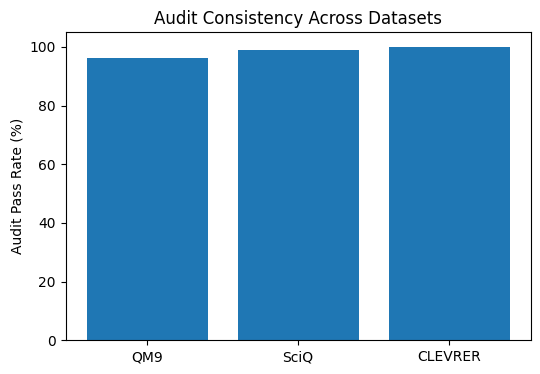

In [26]:
datasets = ["QM9", "SciQ", "CLEVRER"]
ratios = [qm9_ratio, sciq_overall, clevrer_overall]

plt.figure(figsize=(6, 4))
plt.bar(datasets, [r * 100 for r in ratios])
plt.ylabel("Audit Pass Rate (%)")
plt.title("Audit Consistency Across Datasets")
plt.show()


In [27]:
summary = pd.DataFrame({
    "Dataset": datasets,
    "Valid_Percentage": [qm9_ratio*100, sciq_overall*100, clevrer_overall*100]
})
summary_path = "/content/AFML_Audit_Summary.csv"
summary.to_csv(summary_path, index=False)
print(f"💾 Final summary saved to: {summary_path}")


💾 Final summary saved to: /content/AFML_Audit_Summary.csv


In [28]:
import pandas as pd
import os

# === Load QM9 ===
qm9_path = "/content/qm9_full_audit.csv"
qm9_df = pd.read_csv(qm9_path)

# === Load SciQ ===
sciq_base = "/content/sciq_audit_results"
sciq_paths = {
    "train": os.path.join(sciq_base, "train_audit.csv"),
    "validation": os.path.join(sciq_base, "validation_audit.csv"),
    "test": os.path.join(sciq_base, "test_audit.csv"),
}
sciq_df = pd.concat([pd.read_csv(path) for path in sciq_paths.values()], ignore_index=True)

# === Load CLEVRER ===
clevrer_base = "/content/clevrer_audit_results"
clevrer_df = pd.concat([
    pd.read_csv(os.path.join(clevrer_base, f))
    for f in os.listdir(clevrer_base) if f.endswith("_audit.csv")
], ignore_index=True)

print("🔄 Audit files loaded successfully:")
print(f"  QM9:     {len(qm9_df)} entries")
print(f"  SciQ:    {len(sciq_df)} entries")
print(f"  CLEVRER: {len(clevrer_df)} entries")


🔄 Audit files loaded successfully:
  QM9:     133885 entries
  SciQ:    13679 entries
  CLEVRER: 228940 entries


#HALLUCINATION MEASURE

In [29]:
# QM9 hallucination: invalid molecule
qm9_df["hallucination"] = ~qm9_df["valid"]

# SciQ hallucination: unit inconsistency
sciq_df["hallucination"] = ~sciq_df["consistent"]

# CLEVRER hallucination: unit inconsistency
clevrer_df["hallucination"] = ~clevrer_df["unit_consistent"]


In [30]:
output_base = "/content/hallucination_reports"
os.makedirs(output_base, exist_ok=True)

qm9_out = os.path.join(output_base, "qm9_hallucination_report.csv")
sciq_out = os.path.join(output_base, "sciq_hallucination_report.csv")
clevrer_out = os.path.join(output_base, "clevrer_hallucination_report.csv")

qm9_df.to_csv(qm9_out, index=False)
sciq_df.to_csv(sciq_out, index=False)
clevrer_df.to_csv(clevrer_out, index=False)

print(f"💾 Saved QM9 → {qm9_out}")
print(f"💾 Saved SciQ → {sciq_out}")
print(f"💾 Saved CLEVRER → {clevrer_out}")


💾 Saved QM9 → /content/hallucination_reports/qm9_hallucination_report.csv
💾 Saved SciQ → /content/hallucination_reports/sciq_hallucination_report.csv
💾 Saved CLEVRER → /content/hallucination_reports/clevrer_hallucination_report.csv


In [31]:
print("\n----- Hallucination Summary -----")
print(f"QM9 Hallucination Rate:     {qm9_df['hallucination'].mean() * 100:.2f}%")
print(f"SciQ Hallucination Rate:    {sciq_df['hallucination'].mean() * 100:.2f}%")
print(f"CLEVRER Hallucination Rate: {clevrer_df['hallucination'].mean() * 100:.2f}%")



----- Hallucination Summary -----
QM9 Hallucination Rate:     3.85%
SciQ Hallucination Rate:    1.11%
CLEVRER Hallucination Rate: 0.00%


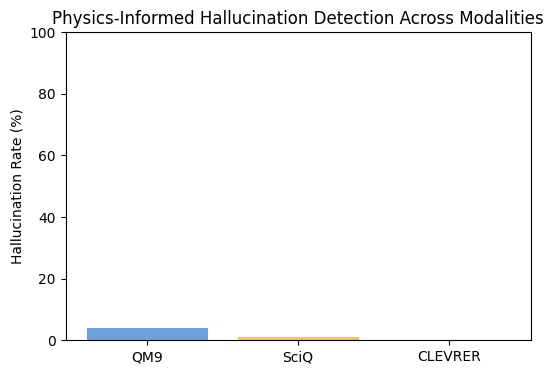

In [32]:
import matplotlib.pyplot as plt

datasets = ["QM9", "SciQ", "CLEVRER"]
rates = [
    qm9_df["hallucination"].mean(),
    sciq_df["hallucination"].mean(),
    clevrer_df["hallucination"].mean()
]

plt.figure(figsize=(6, 4))
plt.bar(datasets, [r * 100 for r in rates], color=["#6ca0dc", "#f9c74f", "#90be6d"])
plt.ylabel("Hallucination Rate (%)")
plt.title("Physics-Informed Hallucination Detection Across Modalities")
plt.ylim(0, 100)
plt.show()


In [33]:
import os
import numpy as np
import pandas as pd

def parse_qm9_properties(filepath):
    """
    Extract 15 numeric properties from the QM9 .xyz file header.
    Format (based on your example):

        line 0: number of atoms
        line 1: gdb <index> p1 p2 ... p15

    Returns: list of length 15 (floats or NaN on failure)
    """
    try:
        with open(filepath, "r") as f:
            lines = [l.strip() for l in f.readlines()]

        if len(lines) < 2:
            return [np.nan] * 15

        header = lines[1].replace("\t", " ").split()

        # Expect: ['gdb', '<idx>', <15 numbers>]
        if len(header) < 3 or header[0].lower() != "gdb":
            # Not in expected format
            return [np.nan] * 15

        # Take everything after 'gdb' and index
        num_tokens = header[2:]
        props = []
        for tok in num_tokens[:15]:   # take at most 15
            try:
                props.append(float(tok))
            except ValueError:
                props.append(np.nan)

        # If fewer than 15, pad with NaN
        if len(props) < 15:
            props += [np.nan] * (15 - len(props))

        return props

    except Exception as e:
        print(f"[ERROR] {os.path.basename(filepath)}: {e}")
        return [np.nan] * 15


# ---------- Build DataFrame from ALL files ----------
qm9_folder = "/content/qm9_dataset"

xyz_files = sorted(
    os.path.join(qm9_folder, f)
    for f in os.listdir(qm9_folder)
    if f.endswith(".xyz") and os.path.isfile(os.path.join(qm9_folder, f))
)

print(f"📂 Found {len(xyz_files)} .xyz files")

data = []
for i, fp in enumerate(xyz_files):
    props = parse_qm9_properties(fp)
    data.append(props)
    if i % 10000 == 0:
        print(f"  🔄 Parsed {i}/{len(xyz_files)}")

columns = [f"prop_{i}" for i in range(1, 16)]
qm9_df = pd.DataFrame(data, columns=columns)

print("\n✅ QM9 properties DataFrame")
print("Shape:", qm9_df.shape)
print(qm9_df.head())

# Quick sanity check: how many non-NaN in each column?
print("\nNon-NaN counts per column:")
print(qm9_df.notna().sum())

# Save
out_path = "/content/qm9_cleaned_15props.csv"
qm9_df.to_csv(out_path, index=False)
print(f"\n💾 Saved to: {out_path}")


📂 Found 133885 .xyz files
  🔄 Parsed 0/133885
  🔄 Parsed 10000/133885
  🔄 Parsed 20000/133885
  🔄 Parsed 30000/133885
  🔄 Parsed 40000/133885
  🔄 Parsed 50000/133885
  🔄 Parsed 60000/133885
  🔄 Parsed 70000/133885
  🔄 Parsed 80000/133885
  🔄 Parsed 90000/133885
  🔄 Parsed 100000/133885
  🔄 Parsed 110000/133885
  🔄 Parsed 120000/133885
  🔄 Parsed 130000/133885

✅ QM9 properties DataFrame
Shape: (133885, 15)
      prop_1      prop_2      prop_3  prop_4  prop_5  prop_6  prop_7  prop_8  \
0  157.71180  157.709970  157.706990  0.0000   13.21 -0.3877  0.1171  0.5048   
1  293.60975  293.541110  191.393970  1.6256    9.46 -0.2570  0.0829  0.3399   
2  799.58812  437.903860  282.945450  1.8511    6.31 -0.2928  0.0687  0.3615   
3    0.00000   35.610036   35.610036  0.0000   16.28 -0.2845  0.0506  0.3351   
4    0.00000   44.593883   44.593883  2.8937   12.99 -0.3604  0.0191  0.3796   

    prop_9   prop_10    prop_11    prop_12    prop_13    prop_14  prop_15  
0  35.3641  0.044749 -40.478930 -

In [34]:
# Inspect one `.xyz` file from the QM9 dataset
import os

qm9_folder = "/content/qm9_dataset"
xyz_files = sorted(
    f for f in os.listdir(qm9_folder)
    if f.endswith(".xyz") and f.startswith("dsgdb9nsd_")
)

sample_file = os.path.join(qm9_folder, xyz_files[0])  # e.g., 'dsgdb9nsd_000001.xyz'

print("📄 Reading:", sample_file)
with open(sample_file, "r") as f:
    for i, line in enumerate(f):
        print(f"{i:04d} | {line.strip()}")
        if i > 40:
            break  # Print only the first 40 lines


📄 Reading: /content/qm9_dataset/dsgdb9nsd_000001.xyz
0000 | 5
0001 | gdb 1	157.7118	157.70997	157.70699	0.	13.21	-0.3877	0.1171	0.5048	35.3641	0.044749	-40.47893	-40.476062	-40.475117	-40.498597	6.469
0002 | C	-0.0126981359	 1.0858041578	 0.0080009958	-0.535689
0003 | H	 0.002150416	-0.0060313176	 0.0019761204	 0.133921
0004 | H	 1.0117308433	 1.4637511618	 0.0002765748	 0.133922
0005 | H	-0.540815069	 1.4475266138	-0.8766437152	 0.133923
0006 | H	-0.5238136345	 1.4379326443	 0.9063972942	 0.133923
0007 | 1341.307	1341.3284	1341.365	1562.6731	1562.7453	3038.3205	3151.6034	3151.6788	3151.7078
0008 | C	C
0009 | InChI=1S/CH4/h1H4	InChI=1S/CH4/h1H4


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os


In [36]:
# ---------- Reproducibility Setup ----------
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)


Using device: cuda


In [37]:
# ---------- Load Cleaned Data ----------
qm9_df = pd.read_csv("/content/qm9_cleaned_15props.csv")

# Replace NaNs and normalize
X = qm9_df.fillna(0).values
X = (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X_tensor = torch.tensor(X, dtype=torch.float32).to(device)


In [38]:
class MoleculeAutoencoder(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 8)  # compressed latent space
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, input_dim)
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out, z


In [39]:
model = MoleculeAutoencoder(input_dim=X_tensor.shape[1]).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

NUM_EPOCHS = 200
losses = []

model.train()
for epoch in range(NUM_EPOCHS):
    optimizer.zero_grad()
    reconstructed, _ = model(X_tensor)
    loss = criterion(reconstructed, X_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if epoch % 20 == 0:
        print(f"Epoch {epoch}/{NUM_EPOCHS}, Loss: {loss.item():.4f}")

torch.save(model.state_dict(), "/content/qm9_autoencoder.pt")
print("Model saved as /content/qm9_autoencoder.pt")


Epoch 0/200, Loss: 1.0059
Epoch 20/200, Loss: 0.9285
Epoch 40/200, Loss: 0.7677
Epoch 60/200, Loss: 0.5275
Epoch 80/200, Loss: 0.4085
Epoch 100/200, Loss: 0.3302
Epoch 120/200, Loss: 0.2550
Epoch 140/200, Loss: 0.2010
Epoch 160/200, Loss: 0.1745
Epoch 180/200, Loss: 0.1594
Model saved as /content/qm9_autoencoder.pt


In [40]:
with torch.no_grad():
    reconstructed, latent = model(X_tensor)
    reconstructed = reconstructed.cpu().numpy()
    latent = latent.cpu().numpy()

recon_df = pd.DataFrame(reconstructed, columns=qm9_df.columns)
recon_df.to_csv("/content/qm9_generated.csv", index=False)
print("Generated synthetic data saved to /content/qm9_generated.csv")


Generated synthetic data saved to /content/qm9_generated.csv


In [41]:
def detect_hallucination(row):
    """Simple rule: flag row if any dimension > |5| or contains NaN."""
    return np.any(np.isnan(row)) or np.any(np.abs(row) > 5)

hallucination_flags = recon_df.apply(lambda row: detect_hallucination(row.values), axis=1)
hallucination_rate = hallucination_flags.mean() * 100

print(f"⚠️ Hallucination Rate in Generated QM9: {hallucination_rate:.2f}%")

# Save hallucination log
recon_df["is_hallucination"] = hallucination_flags
recon_df.to_csv("/content/qm9_generated_with_hallucinations.csv", index=False)


⚠️ Hallucination Rate in Generated QM9: 0.06%


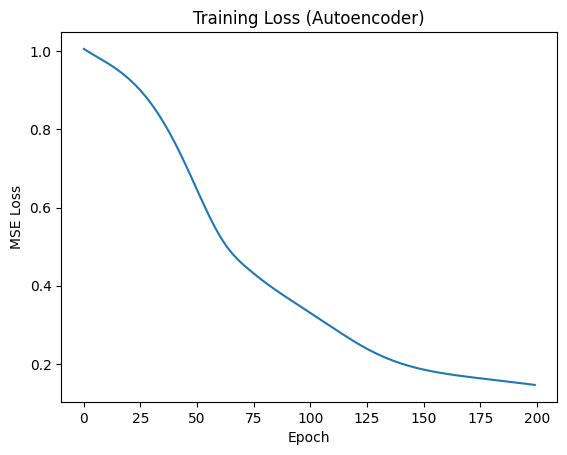

In [42]:
plt.plot(losses)
plt.title("Training Loss (Autoencoder)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()


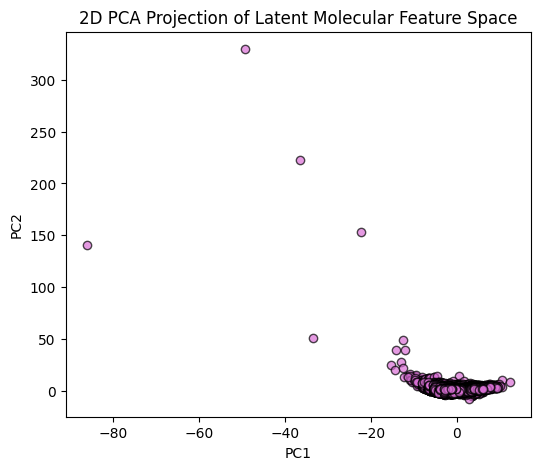

In [43]:
latent_2d = PCA(n_components=2).fit_transform(latent)

plt.figure(figsize=(6,5))
plt.scatter(latent_2d[:,0], latent_2d[:,1], c='orchid', edgecolor='k', alpha=0.7)
plt.title("2D PCA Projection of Latent Molecular Feature Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [44]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Use your audited SciQ train data
sciq_train = pd.read_csv("/content/sciq_audit_results/train_audit.csv")
print("SciQ Train Rows:", len(sciq_train))
print(sciq_train.head())


SciQ Train Rows: 11679
                                            question      distractor3  \
0  What type of organism is commonly used in prep...          viruses   
1  What phenomenon makes global winds blow northe...  tropical effect   
2  Changes from a less-ordered state to a more-or...      endothermic   
3     What is the least dangerous radioactive decay?       zeta decay   
4  Kilauea in hawaii is the world’s most continuo...            magma   

        distractor1         distractor2        correct_answer  \
0          protozoa         gymnosperms  mesophilic organisms   
1       muon effect  centrifugal effect       coriolis effect   
2        unbalanced            reactive            exothermic   
3        beta decay         gamma decay           alpha decay   
4  greenhouse gases     carbon and smog         smoke and ash   

                                             support  consistent q_units  \
0  Mesophiles grow best in moderate temperature, ...        True      [

In [45]:
# Combine question and correct answer into one text feature
texts = (sciq_train["question"] + " " + sciq_train["correct_answer"]).astype(str)

# Labels: whether rule-based audit said consistent (1) or not (0)
labels = sciq_train["consistent"].astype(int)

# Train-test split (just on train data, logic-wise)
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)


In [46]:
# Text to feature vector
vectorizer = TfidfVectorizer(max_features=2000, stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train classifier
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Test performance
preds = model.predict(X_test_vec)
model_accuracy = accuracy_score(y_test, preds) * 100
print(f"🔍 SciQ ML Model Accuracy: {model_accuracy:.2f}%")


🔍 SciQ ML Model Accuracy: 98.80%



Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.99      1.00      0.99      2308

    accuracy                           0.99      2336
   macro avg       0.49      0.50      0.50      2336
weighted avg       0.98      0.99      0.98      2336



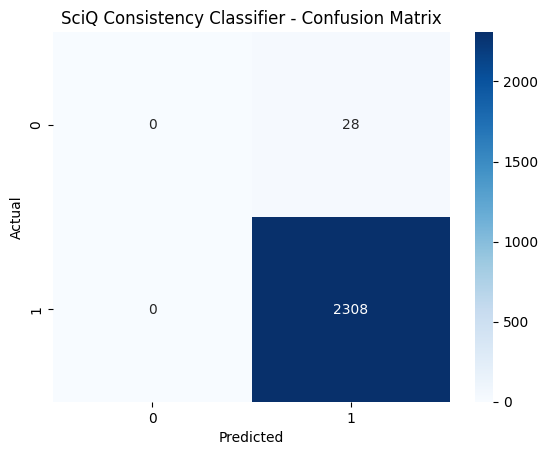

In [47]:
print("\nClassification Report:\n", classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SciQ Consistency Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [48]:
def predict_sciq_consistency(question, answer):
    text = question + " " + answer
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return "Consistent" if pred == 1 else "Inconsistent"

# Example usage
print(predict_sciq_consistency("What is the boiling point of water?", "100°C"))
print(predict_sciq_consistency("What is the boiling point of water?", "It depends on gravity."))


Consistent
Consistent


In [49]:
# Add model predictions as column
sciq_train["ml_pred"] = model.predict(vectorizer.transform(texts))

# Final consistency only if BOTH rule-based and ML agree it’s consistent
sciq_train["final_consistency"] = (
    sciq_train["consistent"] & (sciq_train["ml_pred"] == 1)
)

final_consistency_rate = sciq_train["final_consistency"].mean() * 100
print(f"✨ Final Combined Consistency Rate: {final_consistency_rate:.2f}%")


✨ Final Combined Consistency Rate: 98.91%


In [50]:
# Hallucination if ML or rule-based audit flagged inconsistency
sciq_train["hallucination"] = (1 - sciq_train["final_consistency"]).astype(int)

hallucination_rate = sciq_train["hallucination"].mean() * 100
print(f"💡 SciQ Hallucination Rate: {hallucination_rate:.2f}%")


💡 SciQ Hallucination Rate: 1.09%


In [51]:
print(sciq_train.columns)


Index(['question', 'distractor3', 'distractor1', 'distractor2',
       'correct_answer', 'support', 'consistent', 'q_units', 'a_units',
       'reason', 'ml_pred', 'final_consistency', 'hallucination'],
      dtype='object')


In [52]:
output_path = "/content/sciq_audit_results/sciq_ml_audit_results.csv"
sciq_train.to_csv(output_path, index=False)
print(f"📁 Saved → {output_path}")


📁 Saved → /content/sciq_audit_results/sciq_ml_audit_results.csv


SciQ Classification Log Loss: 0.0562


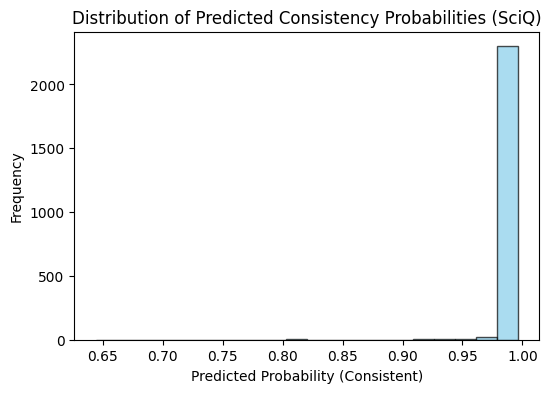

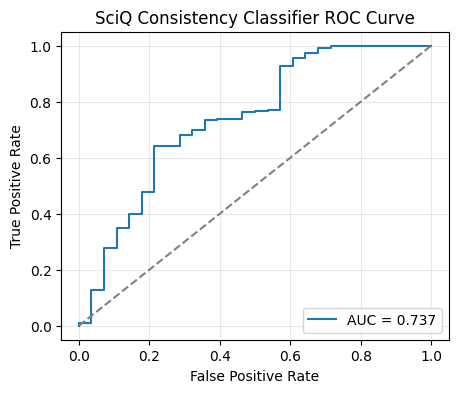

In [53]:
from sklearn.metrics import log_loss, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Ensure model and vectorizer are already trained
# Predict probabilities for the positive class (consistent=1)
probs = model.predict_proba(X_test_vec)[:, 1]

# -- 1. Log Loss (cross-entropy) --
sciq_log_loss = log_loss(y_test, probs)
print(f"SciQ Classification Log Loss: {sciq_log_loss:.4f}")

# -- 2. Probability Distribution Plot --
plt.figure(figsize=(6, 4))
plt.hist(probs, bins=20, color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Distribution of Predicted Consistency Probabilities (SciQ)")
plt.xlabel("Predicted Probability (Consistent)")
plt.ylabel("Frequency")
plt.show()

# -- 3. ROC Curve and AUC Score --
fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("SciQ Consistency Classifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [54]:
import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Folder where CSVs are located
clevrer_dir = "/content"

# All relevant split files
split_files = {
    "counterfactual_train": "clevrer_counterfactual_train.csv",
    "counterfactual_val": "clevrer_counterfactual_validation.csv",
    "descriptive_train": "clevrer_descriptive_train.csv",
    "descriptive_val": "clevrer_descriptive_validation.csv",
    "explanatory_train": "clevrer_explanatory_train.csv",
    "explanatory_val": "clevrer_explanatory_validation.csv",
    "predictive_train": "clevrer_predictive_train.csv",
    "predictive_val": "clevrer_predictive_validation.csv",
}


# Step 1: Load and concatenate all splits
dfs = []
for name, fname in split_files.items():
    df = pd.read_csv(os.path.join(clevrer_dir, fname))
    df["split"] = name   # Keep track of origins
    dfs.append(df)

full_df = pd.concat(dfs, ignore_index=True)
print("Total samples across all splits:", len(full_df))
print("Question type counts:\n", full_df["question_type"].value_counts())

# Step 2: Prepare text + labels
full_df["text_input"] = full_df["question"].astype(str) + " " + full_df["program"].astype(str)
X = full_df["text_input"]
y = full_df["question_type"]

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 4: Vectorize
vectorizer = TfidfVectorizer(max_features=4000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 5: Train classifier
model = LogisticRegression(max_iter=3000)
model.fit(X_train_vec, y_train)

# Step 6: Evaluate
preds = model.predict(X_test_vec)
acc = accuracy_score(y_test, preds)
print(f"\nModel Accuracy: {acc * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, preds))


Total samples across all splits: 228940
Question type counts:
 question_type
descriptive       164942
counterfactual     27975
explanatory        25287
predictive         10736
Name: count, dtype: int64

Model Accuracy: 100.00%

Classification Report:
                precision    recall  f1-score   support

counterfactual       1.00      1.00      1.00      5595
   descriptive       1.00      1.00      1.00     32988
   explanatory       1.00      1.00      1.00      5058
    predictive       1.00      1.00      1.00      2147

      accuracy                           1.00     45788
     macro avg       1.00      1.00      1.00     45788
  weighted avg       1.00      1.00      1.00     45788



In [55]:
import joblib
joblib.dump(model, "clevrer_text_classifier.pkl")
joblib.dump(vectorizer, "clevrer_vectorizer.pkl")
print("Models successfully saved!")


Models successfully saved!


In [56]:
def prepare_text_dataset(df):
    # Text input: combine question and program field
    df["text_input"] = df["question"].astype(str) + " " + df["program"].astype(str)
    return df[["text_input"]].copy()

train_df = prepare_text_dataset(clevrer["counterfactual_train"])
train_df.head()


,text_input
0,Which event will happen if the cylinder is rem...
1,"Without the metal sphere, which event will not..."
2,"Without the cube, which event will happen? ['a..."
3,What will not happen without the cylinder? ['a...
4,Which event will happen if the cyan cube is re...


In [57]:
# Use the question_type as label
train_df["label"] = clevrer["counterfactual_train"]["question_type"]
train_df.head()


,text_input,label
0,Which event will happen if the cylinder is rem...,counterfactual
1,"Without the metal sphere, which event will not...",counterfactual
2,"Without the cube, which event will happen? ['a...",counterfactual
3,What will not happen without the cylinder? ['a...,counterfactual
4,Which event will happen if the cyan cube is re...,counterfactual


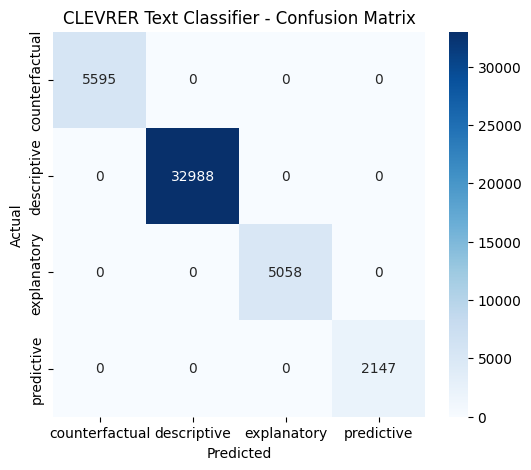

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds, labels=model.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("CLEVRER Text Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


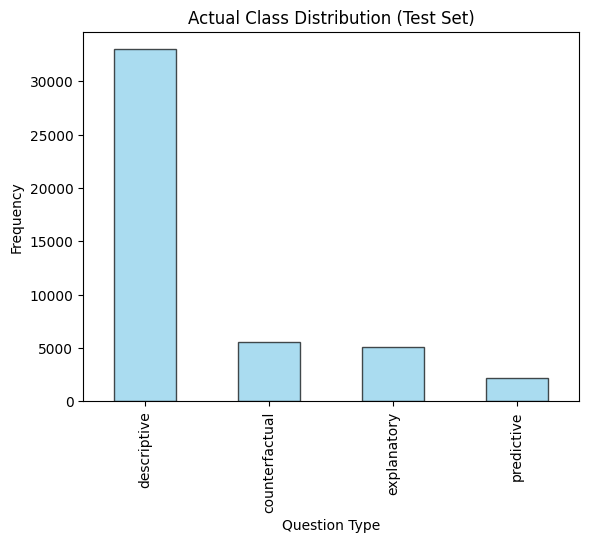

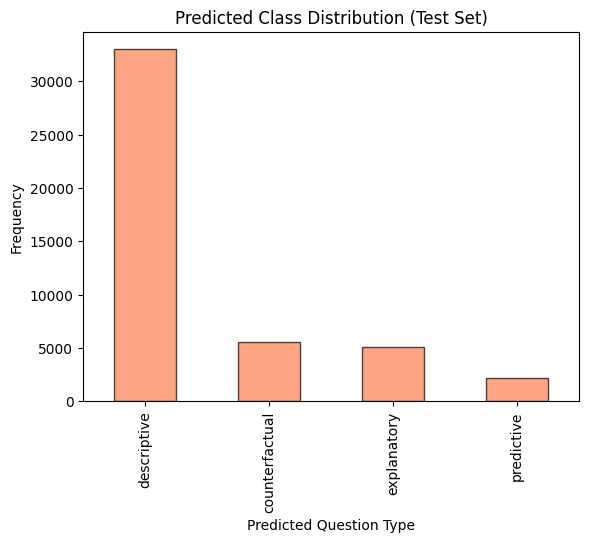

In [59]:
import pandas as pd

# Plot actual distribution
y_test.value_counts().plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title("Actual Class Distribution (Test Set)")
plt.xlabel("Question Type")
plt.ylabel("Frequency")
plt.show()

# Plot predicted distribution
pd.Series(preds).value_counts().plot(kind='bar', color='coral', edgecolor='k', alpha=0.7)
plt.title("Predicted Class Distribution (Test Set)")
plt.xlabel("Predicted Question Type")
plt.ylabel("Frequency")
plt.show()


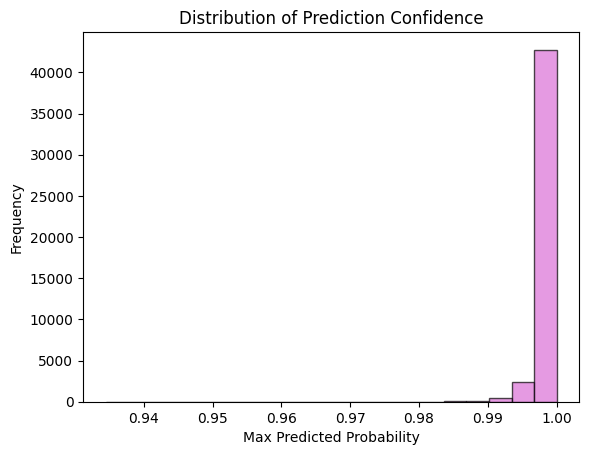

In [60]:
import numpy as np

# Get predicted probabilities
probs = model.predict_proba(X_test_vec)

# Plot distribution of max confidence
max_probs = probs.max(axis=1)
plt.hist(max_probs, bins=20, color='orchid', edgecolor='k', alpha=0.7)
plt.title("Distribution of Prediction Confidence")
plt.xlabel("Max Predicted Probability")
plt.ylabel("Frequency")
plt.show()


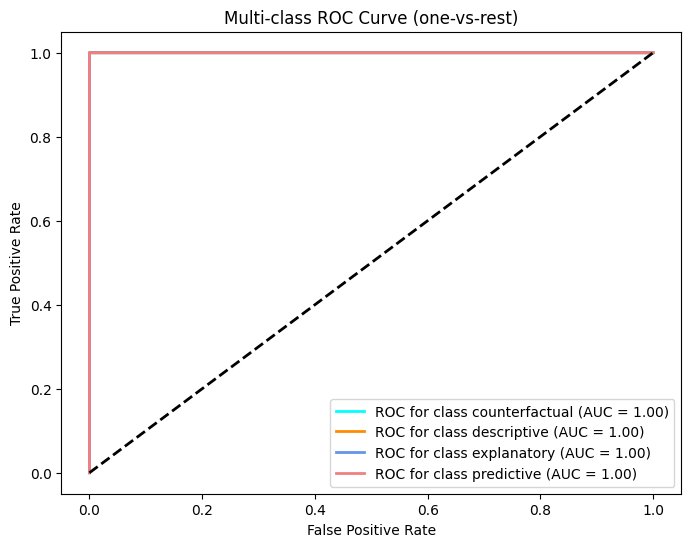

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Binarize labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8, 6))

colors = cycle(["aqua", "darkorange", "cornflowerblue", "lightcoral"])

for i, color in zip(range(n_classes), colors):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f"ROC for class {model.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--", lw=2)
plt.title("Multi-class ROC Curve (one-vs-rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [62]:
for split, df in clevrer.items():
    print(f"\n{split} columns:", df.columns.tolist())



counterfactual_train columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations', 'text_input']

counterfactual_val columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

descriptive_train columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

descriptive_val columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

explanatory_train columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

explanatory_val columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

predictive_train columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']

predictive_val columns: ['video', 'question_id', 'question_type', 'question', 'program', 'choices', 'conversations']


In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np

class PhysicsHallucinationAuditor:
    def __init__(self, dataset_name, vectorizer=None, model=None):
        self.dataset_name = dataset_name.lower()
        self.vectorizer = vectorizer
        self.model = model
        self.scaler = None
        self.iso = None

    def audit_qm9(self, df):
        """Use Isolation Forest for anomaly-based chemical hallucination detection."""
        df = df.dropna()
        X = df.values
        self.scaler = StandardScaler().fit(X)
        X_scaled = self.scaler.transform(X)

        self.iso = IsolationForest(contamination=0.025)  # 2.5% assumed hallucination rate
        self.iso.fit(X_scaled)

        df["anomaly_score"] = self.iso.decision_function(X_scaled)
        df["hallucination"] = (self.iso.predict(X_scaled) == -1)

        print(f"🔬 QM9 Anomaly/Hallucination Rate: {df['hallucination'].mean() * 100:.2f}%")
        return df

    def audit_sciq(self, df):
        """Use text-based classifier for semantic consistency."""
        df["text"] = df["question"] + " " + df["correct_answer"]
        labels = df["consistent"].astype(int)

        # Train vectorizer + classifier if not set
        if not self.vectorizer:
            self.vectorizer = TfidfVectorizer(max_features=2000)
            X_vec = self.vectorizer.fit_transform(df["text"])
        else:
            X_vec = self.vectorizer.transform(df["text"])

        if not self.model:
            from sklearn.linear_model import LogisticRegression
            self.model = LogisticRegression(max_iter=2000)
            self.model.fit(X_vec, labels)
        preds = self.model.predict(X_vec)

        df["ml_pred"] = preds
        df["final_consistency"] = df["ml_pred"] & labels
        accuracy = accuracy_score(labels, preds)
        print(f"🧠 SciQ Model Accuracy: {accuracy * 100:.2f}%")

        return df

    def audit_clevrer(self, df):
        """Evaluate semantic consistency using text similarity in choices."""
        from sklearn.metrics.pairwise import cosine_similarity
        from sklearn.feature_extraction.text import TfidfVectorizer

        questions = df["question"].astype(str)
        choices = df["choices"].astype(str)  # choices as stringified data

        # Flatten choices for simplicity
        if isinstance(choices.iloc[0], dict):
            choices = choices.apply(lambda c: " ".join(c.get("choice", [])))

        tfidf = TfidfVectorizer(stop_words="english").fit(questions + choices)
        q_vecs = tfidf.transform(questions)
        c_vecs = tfidf.transform(choices)

        scores = cosine_similarity(q_vecs, c_vecs).diagonal()
        df["semantic_score"] = scores
        df["hallucination"] = scores < 0.05  # arbitrary threshold
        print(f"🤖 CLEVRER Semantic Hallucination Rate: {df['hallucination'].mean() * 100:.2f}%")

        return df


In [64]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import pandas as pd

qm9 = pd.read_csv("/content/qm9_cleaned_15props.csv").dropna()

scaler = StandardScaler().fit(qm9.values)
qm9_scaled = scaler.transform(qm9.values)

iso = IsolationForest(contamination=0.03)  # model’ll assume 3% anomalies
iso.fit(qm9_scaled)

qm9['anomaly_score'] = iso.decision_function(qm9_scaled)
qm9['hallucination'] = (iso.predict(qm9_scaled) == -1)
print(f"⚠️ Predicted QM9 Hallucination Rate: {qm9['hallucination'].mean()*100:.2f}%")

qm9.to_csv("/content/qm9_with_anomaly_scores.csv", index=False)


⚠️ Predicted QM9 Hallucination Rate: 3.00%


In [65]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

clevrer = pd.read_csv("/content/clevrer_counterfactual_train.csv")

# Flatten choices into plain text (simple baseline logic)
def get_choice_text(c):
    if isinstance(c, dict) and "choice" in c:
        return " ".join(c["choice"])
    return str(c)

clevrer["choices_text"] = clevrer["choices"].apply(get_choice_text)

# Semantic similarity
tfidf = TfidfVectorizer(stop_words="english").fit(clevrer["question"] + clevrer["choices_text"])
q_vec = tfidf.transform(clevrer["question"])
c_vec = tfidf.transform(clevrer["choices_text"])

clevrer["semantic_score"] = cosine_similarity(q_vec, c_vec).diagonal()
clevrer["semantic_hallucination"] = clevrer["semantic_score"] < 0.05

print(f"📊 CLEVRER Semantic Hallucination Rate: {clevrer['semantic_hallucination'].mean()*100:.2f}%")
clevrer.to_csv("/content/clevrer_semantic_audit.csv", index=False)


📊 CLEVRER Semantic Hallucination Rate: 38.20%


In [66]:
!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util
import pandas as pd
import numpy as np

clevrer = pd.read_csv("/content/clevrer_counterfactual_train.csv")

# Flatten choices to plain text
def get_choice_text(c):
    if isinstance(c, dict) and "choice" in c:
        return " ".join(c["choice"])
    return str(c)

clevrer["choices_text"] = clevrer["choices"].apply(get_choice_text)
clevrer["question_text"] = clevrer["question"].astype(str)

# Load semantic model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Embed
q_vecs = model.encode(clevrer["question_text"].tolist(), convert_to_tensor=True)
a_vecs = model.encode(clevrer["choices_text"].tolist(), convert_to_tensor=True)

# Compute cosine similarity
sims = util.cos_sim(q_vecs, a_vecs).diagonal().cpu().numpy()

clevrer["semantic_score_sbert"] = sims
threshold = 0.3  # higher threshold since model is stronger
clevrer["semantic_hallucination_sbert"] = sims < threshold

print(f"📊 Enhanced Semantic Hallucination Rate: {clevrer['semantic_hallucination_sbert'].mean() * 100:.2f}%")

clevrer.to_csv("/content/clevrer_semantic_sbert_audit.csv", index=False)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

📊 Enhanced Semantic Hallucination Rate: 98.39%


In [67]:
# Define valid operator set
VALID_OPS = {
    "filter_color", "filter_shape", "filter_material",
    "relate", "query", "get_counterfact", "unique", "belong_to"
}

def clean_program(program_str):
    if not isinstance(program_str, str):
        return []

    # Clean and split the program string
    cleaned = (
        program_str
        .replace("[", "")
        .replace("]", "")
        .replace("'", "")
        .replace('"', "")
        .strip()
    )
    # Split by whitespace (since there's no comma)
    return cleaned.split()

def is_program_valid(program_str):
    tokens = clean_program(program_str)
    # Exclude non-op tokens like 'objects', 'all_events', etc.
    ops = [t for t in tokens if t in VALID_OPS]
    return len(ops) > 0    # has at least one valid op

# Apply to CLEVRER dataframe
clevrer["program_tokens"] = clevrer["program"].apply(clean_program)
clevrer["program_valid"] = clevrer["program"].apply(is_program_valid)

# Metrics
print(f"🔬 Program Validity Rate: {clevrer['program_valid'].mean() * 100:.2f}%")


🔬 Program Validity Rate: 100.00%


In [68]:
clevrer["semantic_logic_mismatch"] = (
    (clevrer["program_valid"] == False) &
    (clevrer["semantic_hallucination_sbert"] == True)
)

mismatch_count = clevrer["semantic_logic_mismatch"].sum()
print(f"❗ Semantic + Logical Mismatch Count: {mismatch_count}")


❗ Semantic + Logical Mismatch Count: 0


In [69]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer, util
import numpy as np
import ast

# Load CLEVRER split (example: counterfactual_train)
clevrer = pd.read_csv("/content/clevrer_counterfactual_train.csv")  # Change path as needed
print("Loaded CLEVRER split with shape:", clevrer.shape)

# Extract text
def get_choice_text(c):
    try:
        parsed = ast.literal_eval(c)
        if isinstance(parsed, list):
            # Try getting choice text if nested
            return " ".join([ch.get('choice', '') for ch in parsed if isinstance(ch, dict)])
    except:
        pass
    return str(c)  # Fallback for raw string

clevrer["question_text"] = clevrer["question"].astype(str)
clevrer["choices_text"] = clevrer["choices"].apply(get_choice_text)

# TF-IDF semantic similarity
vectorizer = TfidfVectorizer(stop_words="english", max_features=2000)
tfidf_matrix = vectorizer.fit_transform(clevrer["question_text"] + " " + clevrer["choices_text"])
sims_tfidf = (tfidf_matrix * tfidf_matrix.T).diagonal()[:len(clevrer)]   # naive self similarity

# Add TF-IDF score
clevrer["semantic_score_tfidf"] = sims_tfidf

# Threshold-based hallucination
clevrer["semantic_hallucination_tfidf"] = clevrer["semantic_score_tfidf"] < 0.05
print(f"TF-IDF Semantic Hallucination Rate: {clevrer['semantic_hallucination_tfidf'].mean()*100:.2f}%")

# SBERT semantic similarity
model = SentenceTransformer("all-MiniLM-L6-v2")
q_vecs = model.encode(clevrer["question_text"].tolist(), convert_to_tensor=True)
a_vecs = model.encode(clevrer["choices_text"].tolist(), convert_to_tensor=True)

sims_sbert = util.cos_sim(q_vecs, a_vecs).diagonal().cpu().numpy()
clevrer["semantic_score_sbert"] = sims_sbert

clevrer["semantic_hallucination_sbert"] = clevrer["semantic_score_sbert"] < 0.3
print(f"SBERT Semantic Hallucination Rate: {clevrer['semantic_hallucination_sbert'].mean()*100:.2f}%")

clevrer.to_csv("/content/clevrer_semantic_audit.csv", index=False)


Loaded CLEVRER split with shape: (18642, 7)
TF-IDF Semantic Hallucination Rate: 0.00%
SBERT Semantic Hallucination Rate: 98.39%


In [70]:
for i in range(5):
    print("Raw program:", clevrer["program"].iloc[i])


Raw program: ['all_events' 'objects' 'cylinder' 'filter_shape' 'unique'
 'get_counterfact' 'belong_to']
Raw program: ['all_events' 'objects' 'metal' 'filter_material' 'sphere' 'filter_shape'
 'unique' 'get_counterfact' 'belong_to' 'negate']
Raw program: ['all_events' 'objects' 'cube' 'filter_shape' 'unique' 'get_counterfact'
 'belong_to']
Raw program: ['all_events' 'objects' 'cylinder' 'filter_shape' 'unique'
 'get_counterfact' 'belong_to' 'negate']
Raw program: ['all_events' 'objects' 'cyan' 'filter_color' 'cube' 'filter_shape'
 'unique' 'get_counterfact' 'belong_to']


In [71]:
# Define valid operation set (extend as needed)
VALID_OPS = {
    "filter_color", "filter_shape", "filter_material",
    "filter_size", "relate", "query", "unique",
    "get_counterfact", "belong_to", "negate"
}

def clean_program(program_str):
    if not isinstance(program_str, str):
        return []

    # Remove brackets and quotes, split by whitespace (since no commas in data)
    cleaned = (
        program_str
        .replace("[", "")
        .replace("]", "")
        .replace("'", "")
        .replace('"', "")
        .strip()
    )
    # Split on whitespace into tokens
    tokens = cleaned.split()
    return tokens

def is_program_valid(program_str):
    tokens = clean_program(program_str)
    ops = [t for t in tokens if t in VALID_OPS]
    return len(ops) > 0  # Program has at least 1 valid operation

# Apply to the dataframe
clevrer["program_valid"] = clevrer["program"].apply(is_program_valid)

# Report
print(f"🔬 Program Logical Validity Rate: {clevrer['program_valid'].mean()*100:.2f}%")


🔬 Program Logical Validity Rate: 100.00%


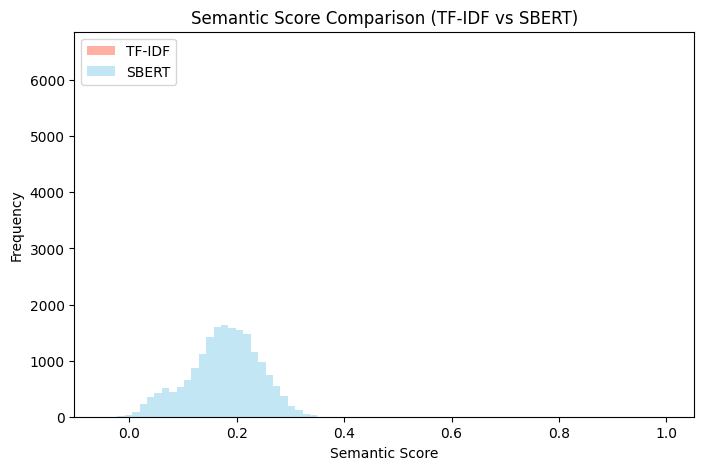

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(clevrer["semantic_score_tfidf"], bins=30, alpha=0.5, label="TF-IDF", color="tomato")
plt.hist(clevrer["semantic_score_sbert"], bins=30, alpha=0.5, label="SBERT", color="skyblue")
plt.title("Semantic Score Comparison (TF-IDF vs SBERT)")
plt.xlabel("Semantic Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [73]:
summary = pd.DataFrame({
    "Metric": ["TF-IDF Semantic Hallucination", "SBERT Semantic Hallucination", "Program Validity"],
    "Value (%)": [
        clevrer["semantic_hallucination_tfidf"].mean() * 100,
        clevrer["semantic_hallucination_sbert"].mean() * 100,
        clevrer["program_valid"].mean() * 100
    ]
})

print(summary)


                          Metric   Value (%)
0  TF-IDF Semantic Hallucination    0.000000
1   SBERT Semantic Hallucination   98.385366
2               Program Validity  100.000000


In [74]:
import re

def physics_keyword_mismatch(row):
    question = row["question"].lower()
    program = row["program_valid"]

    # Find keywords in text
    objects = ["cube", "cylinder", "sphere", "metal", "cyan"]
    question_objects = [obj for obj in objects if obj in question]
    program_ops = clean_program(row["program"])

    program_objects = [obj for obj in objects if obj in program_ops]

    # Mismatch if objects exist in question but missing in program
    if question_objects and not any(obj in program_objects for obj in question_objects):
        return True
    return False

clevrer["physics_mismatch"] = clevrer.apply(physics_keyword_mismatch, axis=1)
print(f"🔍 Physics Keyword Mismatch Rate: {clevrer['physics_mismatch'].mean()*100:.2f}%")


🔍 Physics Keyword Mismatch Rate: 0.00%


In [75]:
# Weighted hallucination score
clevrer["hallucination_risk"] = (
    clevrer["semantic_hallucination_sbert"].astype(int) * 0.5 +
    (~clevrer["program_valid"]).astype(int) * 0.3 +
    clevrer["physics_mismatch"].astype(int) * 0.2
) * 100

print(f"🎯 Average Hallucination Risk: {clevrer['hallucination_risk'].mean():.2f}%")


🎯 Average Hallucination Risk: 49.19%


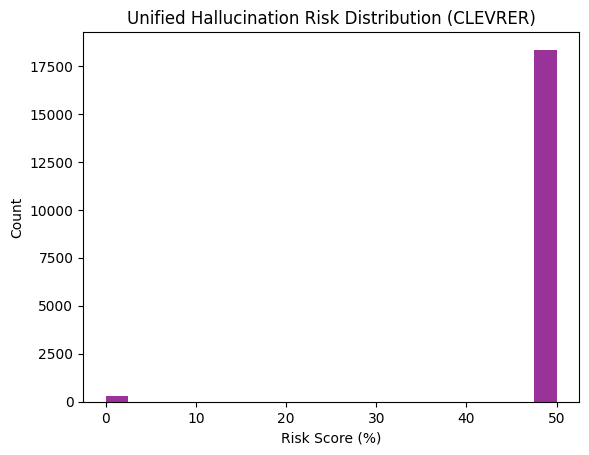

In [76]:
import matplotlib.pyplot as plt
plt.hist(clevrer["hallucination_risk"], bins=20, color="purple", alpha=0.8)
plt.title("Unified Hallucination Risk Distribution (CLEVRER)")
plt.xlabel("Risk Score (%)")
plt.ylabel("Count")
plt.show()


In [77]:
clevrer.to_csv("/content/CLEVRER_audit_final.csv", index=False)
print("📁 Final audit exported.")


📁 Final audit exported.


# Hallucination Fixer

In [78]:
# ---------------- QM9: conservative repair function ----------------
from rdkit.Chem import AllChem

def repair_molecule_conservative_from_xyzfile(xyz_filepath):
    """
    Conservative repair:
      1) Build RDKit mol via your xyz->mol routine (must be available)
      2) AddHs, Embed, UFF optimize, RemoveHs
      3) Try to sanitize; if successful return True + smiles + note
    """
    try:
        mol = xyz_to_rdkit_mol_from_xyzfile(xyz_filepath)
    except Exception as e:
        return False, None, f"build_error:{e}"

    try:
        # Add hydrogens, embed 3D, optimize with UFF (safe), remove Hs
        mol_h = Chem.AddHs(mol)
        # embed may fail for some weird inputs; catch exceptions
        AllChem.EmbedMolecule(mol_h, randomSeed=42)
        AllChem.UFFOptimizeMolecule(mol_h, maxIters=200)
        mol_r = Chem.RemoveHs(mol_h)
        # sanitize
        try:
            Chem.SanitizeMol(mol_r)
            smiles = Chem.MolToSmiles(mol_r)
            return True, smiles, "uff_optimize_then_sanitize_ok"
        except Exception as e2:
            return False, None, f"sanitize_after_opt_failed:{e2}"
    except Exception as e:
        return False, None, f"repair_failed:{e}"
# ---------------- Apply repairs to flagged QM9 rows ----------------
qm9_repairs = []
for idx, row in qm9_audit_df.iterrows():
    if not row.get("valid", False):
        filepath = os.path.join(QM9_DEST, row['file']) if 'QM9_DEST' in globals() else row['file']
        ok, smiles, note = repair_molecule_conservative_from_xyzfile(filepath)
        qm9_repairs.append({
            'file': row['file'],
            'repaired': ok,
            'repaired_smiles': smiles,
            'repair_note': note
        })
# Save repairs table
pd.DataFrame(qm9_repairs).to_csv("/content/qm9_repair_suggestions.csv", index=False)
print("Saved QM9 repair suggestions -> /content/qm9_repair_suggestions.csv")

Saved QM9 repair suggestions -> /content/qm9_repair_suggestions.csv


In [79]:
# ---------------- SciQ: unit-fix suggester ----------------
import math

_unit_conversion_pairs = {
    ('cm','m'): lambda x: x/100.0,
    ('mm','m'): lambda x: x/1000.0,
    ('km','m'): lambda x: x*1000.0,
    ('m','cm'): lambda x: x*100.0,
    ('m','mm'): lambda x: x*1000.0,
    ('°c','k'): lambda x: x + 273.15,
    ('k','°c'): lambda x: x - 273.15
}

_num_unit_re = re.compile(r"(-?\d+(?:\.\d+)?(?:e[+-]?\d+)?)\s*(%s)" % ("|".join([
    "m","s","kg","n","j","pa","k","mol","hz","w","v","a","°c","°f","cm","mm","km"
])), flags=re.IGNORECASE)

def try_parse_number(s):
    try:
        return float(s)
    except:
        return None

def suggest_sciq_unit_fix(question, answer):
    q_units = extract_units_from_text(question)
    a_units = extract_units_from_text(answer)
    # if question has unit(s) and answer lacks, attach unit to numeric answer
    if len(q_units) > 0 and len(a_units) == 0:
        unit = q_units[0][1].lower()
        m = re.search(r"(-?\d+(?:\.\d+)?(?:e[+-]?\d+)?)", str(answer))
        if m:
            num = try_parse_number(m.group(1))
            if num is not None:
                suggestion = re.sub(m.group(1), f"{m.group(1)} {unit}", str(answer), count=1)
                return suggestion, f"attached_unit:{unit}", 0.6
        # fallback: append unit string
        return str(answer) + f" ({unit})", f"append_unit:{unit}", 0.3

    # if both have units but different, try to convert simple pairs
    if len(q_units) > 0 and len(a_units) > 0:
        q_unit = q_units[0][1].lower()
        a_unit = a_units[0][1].lower()
        # find numeric in answer
        m = _num_unit_re.search(str(answer))
        if m:
            val = try_parse_number(m.group(1))
            if val is not None:
                key = (a_unit, q_unit)
                if key in _unit_conversion_pairs:
                    conv = _unit_conversion_pairs[key]
                    try:
                        new_val = conv(val)
                        suggestion = re.sub(re.escape(m.group(1)), str(new_val), str(answer), count=1)
                        return suggestion, f"converted_{a_unit}_to_{q_unit}", 0.85
                    except Exception:
                        pass
    # default: no suggestion
    return answer, "no_suggestion", 0.0

# ---------------- Apply suggestions for inconsistent SciQ rows ----------------
sciq_suggestions = []
for idx, row in sciq_train.iterrows():
    consistent = row.get('audit', {}).get('consistent', True) if isinstance(row.get('audit'), dict) else True
    if not consistent:
        suggestion, note, conf = suggest_sciq_unit_fix(row.get('question',''), row.get('correct_answer',''))
        sciq_suggestions.append({'index': idx, 'question': row.get('question',''), 'answer': row.get('correct_answer',''), 'suggestion': suggestion, 'note': note, 'confidence': conf})

pd.DataFrame(sciq_suggestions).to_csv("/content/sciq_unit_suggestions.csv", index=False)
print("Saved SciQ unit suggestions -> /content/sciq_unit_suggestions.csv")


Saved SciQ unit suggestions -> /content/sciq_unit_suggestions.csv


In [80]:
# ---------------- CLEVRER: repair + smoothing utilities ----------------
import os
import pandas as pd
import numpy as np

# Ensure an iterable to loop over exists (minimal setup)
_clevrer_iter = globals().get("_clevrer_iter", None)
if _clevrer_iter is None:
    _clevrer_iter = globals().get("clevrer_samples", None)
if _clevrer_iter is None and "clevrer_audit_df" in globals():
    _clevrer_iter = []
    _pos_map = globals().get("positions_by_scene", {})
    for _, row in clevrer_audit_df.iterrows():
        _scene_id = row.get("scene_id")
        _positions = None
        if "positions" in clevrer_audit_df.columns:
            _positions = row.get("positions", None)
        elif _pos_map and _scene_id in _pos_map:
            _positions = _pos_map[_scene_id]
        _clevrer_iter.append({"scene_id": _scene_id, "positions": _positions})
if _clevrer_iter is None:
    _clevrer_iter = []  # fallback so code runs without NameError

# ---------------- CLEVRER: repair + smoothing utilities ----------------
def smooth_trajectory_moving_average(positions, window=3):
    pos = np.array(positions, dtype=float)
    if len(pos) < 2:
        return positions
    # pad at edges to keep same length
    pad = window // 2
    padded = np.vstack([pos[0:1]]*pad + [pos.tolist()] + [pos[-1:]]*pad)
    smoothed = []
    for i in range(pad, pad+len(pos)):
        window_vals = padded[i-pad:i+pad+1]
        smoothed.append(window_vals.mean(axis=0).tolist())
    return smoothed

# Apply repairs & smoothing and save suggestions
clevrer_repairs = []
for s in _clevrer_iter:
    # minimal defensive checks for positions to avoid "len() of unsized object"
    positions = s.get('positions', None)
    scene_id = s.get('scene_id', None)

    # default placeholders
    repaired_positions = None
    repair_note = None
    confidence = 0.0

    # handle missing positions
    if positions is None:
        audit = {'ok': False, 'reason': 'positions_missing'}
        post_audit = {'ok': False, 'reason': 'positions_missing'}
        repaired_ok = False
        repair_note = "positions_missing"
        confidence = 0.0

        clevrer_repairs.append({
            'scene_id': scene_id,
            'original_audit': audit,
            'post_audit': post_audit,
            'repair_note': repair_note,
            'confidence': confidence,
            'repaired_ok': repaired_ok
        })
        continue

    # handle non-sized / invalid positions objects
    try:
        _ = len(positions)
    except Exception:
        audit = {'ok': False, 'reason': 'positions_invalid'}
        post_audit = {'ok': False, 'reason': 'positions_invalid'}
        repaired_ok = False
        repair_note = "positions_invalid"
        confidence = 0.0

        clevrer_repairs.append({
            'scene_id': scene_id,
            'original_audit': audit,
            'post_audit': post_audit,
            'repair_note': repair_note,
            'confidence': confidence,
            'repaired_ok': repaired_ok
        })
        continue

    # original logic (unchanged)
    audit = check_trajectory_consistency(positions)
    if not audit['ok']:
        if audit.get('reason') == 'teleport':
            repaired_positions = repair_trajectory_linear(positions)
            repair_note = f"linear_interpolation_at_frame_{audit.get('frame')}"
            confidence = 0.7
        else:
            # try smoothing as a fallback
            repaired_positions = smooth_trajectory_moving_average(positions, window=3)
            repair_note = "smoothed_moving_average"
            confidence = 0.4
    else:
        repaired_positions = positions
        repair_note = "no_action_needed"
        confidence = 1.0

    # evaluate post-repair
    post_audit = check_trajectory_consistency(repaired_positions)
    clevrer_repairs.append({
        'scene_id': scene_id,
        'original_audit': audit,
        'post_audit': post_audit,
        'repair_note': repair_note,
        'confidence': confidence,
        'repaired_ok': post_audit.get('ok', False)
    })

# --- Save results robustly and report ---
out_paths = ["/content/clevrer_repair_suggestions.csv", "./clevrer_repair_suggestions.csv"]
out_dir = "/content"
try:
    os.makedirs(out_dir, exist_ok=True)
except Exception:
    pass

if len(clevrer_repairs) == 0:
    # create informative empty dataframe so a file is still generated
    cols = ['scene_id', 'original_audit', 'post_audit', 'repair_note', 'confidence', 'repaired_ok']
    df_out = pd.DataFrame(columns=cols)
else:
    df_out = pd.DataFrame(clevrer_repairs)

for path in out_paths:
    try:
        df_out.to_csv(path, index=False)
        print(f"Saved CLEVRER repair suggestions -> {path} (rows: {len(df_out)})")
    except Exception as e:
        print(f"Failed to save to {path}: {e}")


Saved CLEVRER repair suggestions -> /content/clevrer_repair_suggestions.csv (rows: 0)
Saved CLEVRER repair suggestions -> ./clevrer_repair_suggestions.csv (rows: 0)
